## **Chest Pain in Cleveland (Section 002, Group 31 Proposal)**

## Introduction

**Background:**
Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect chances of heart disease include unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, and more (https://www.cdc.gov/nchs/hus/topics/heart-disease-deaths.htm#:~:text=Heart%20disease%20has%20been%20the,excessive%20alcohol%20use%20(2)).

Chest pain, such as angina, is often associated with heart disease. Angina is caused by poor blood flow to the heart due to buildup of thick plaques on the inner walls of the arteries carrying blood to the heart (https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838).

Several genetic and lifestyle factors contribute to the risk of developing angina. There is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (https://www.nhlbi.nih.gov/health/angina/causes). 


**Question:** What is the predicted chest pain type (typical angina, atypical angina, non-anginal pain or asymptomatic*) for a given heart disease patient based on various medical factors (age, resting blood pressure, cholesterol, electrocardiographic results, heart rate achieved, and maybe sex, fasting blood sugar amount, and exercise-induced angina)?

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

## Preliminary Data Analysis

Here, we will show that our dataset can be read from the web into R. We will also wrangle our data into a tidy format and visualize it. First, we will attach the necessary libraries.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we will read in the data (stored in our notebook) and add column names.

In [2]:
#read data here
data <- read_csv("processed.cleveland.data", col_names=FALSE)

heart_data <- data <- rename(data,
            age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14)
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Below is a description of each of the columns of data and what the labels correspond to:

1. `age` (years)
2. `sex` (1=male; 0=female)
3. `cp` is chest pain type. (1=typical angina; 2=atypical angina; 3=non-anginal pain; 4=asymptomatic)
4. `restbp` is resting blood pressure. (mm Hg)
5. `chol` is serum cholesterol. (mg/dl)
6. `fbs` is whether fasting blood sugar is greater than 120 mg/dl. (1=yes; 0=no)
7. `restecg` is resting electrocardiographic results. (0=normal; 1=ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy)
8. `thalach` is maximum heart rate achieved.
9. `exang` is exercise-induced angina. (1=yes; 0=no) 
10. `oldpeak` is ST depression induced by exercise relative to rest.
11. `slope` is slope of the peak exercise ST segment. (1=upsloping; 2=flat, 3=downsloping)
12. `ca` is number of major vessels colored by flourosopy. (1-3)
13. `thal` is ?? (the website gave no information on its meaning). (3=normal, 6=fixed defect, 7=reversable defect)
14. `num` is diagnosis of heart disease. (0=<50% diameter narrowing, 1=>50% diameter narrowing)

We will not be using all of the data to answer our research question, and some columns are untidy (categorical values are listed numerically, which may be unhelpful when trying to visualize and understand the data). Thus, we will tidy and wrangle the data we want in the coding cell below.

In [3]:
#clean and wrangle data
#filter data for variables (that we understand and want to experiment with) to be included in dataset
#mutate certain rows to have categorical values

filter_data <- heart_data|>
    select(cp, age, restbp, chol, restecg, thalach, sex, exang)|>
    mutate(cp = as_factor(cp))|>
    mutate(sex = as_factor(sex)) 

In [4]:
#split data into training and testing
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [5]:
#using training data, summarize data into tables of mean values and median values
mean_table <- filter_data |>
    group_by(cp) |>
    summarize(age=mean(age, na.rm=TRUE),
             restbp=mean(restbp, na.rm=TRUE),
             chol=mean(chol, na.rm=TRUE),
             thalach=mean(thalach, na.rm=TRUE))
mean_table

median_table <- filter_data |>
    group_by(cp) |>
    summarize(age=median(age, na.rm=TRUE),
             restbp=median(restbp, na.rm=TRUE),
             chol=median(chol, na.rm=TRUE),
             thalach=median(thalach, na.rm=TRUE))
median_table

cp,age,restbp,chol,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,55.86957,140.8696,237.1304,155.9565
2,51.36000,128.4000,244.7800,162.4200
3,53.69767,130.2907,243.9651,155.4070
4,55.72222,132.2014,250.5139,140.6806


cp,age,restbp,chol,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,159.0
2,52,128,238,163.5
3,53,130,234,157.5
4,57,130,248,143.0


In [9]:
library(RColorBrewer)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




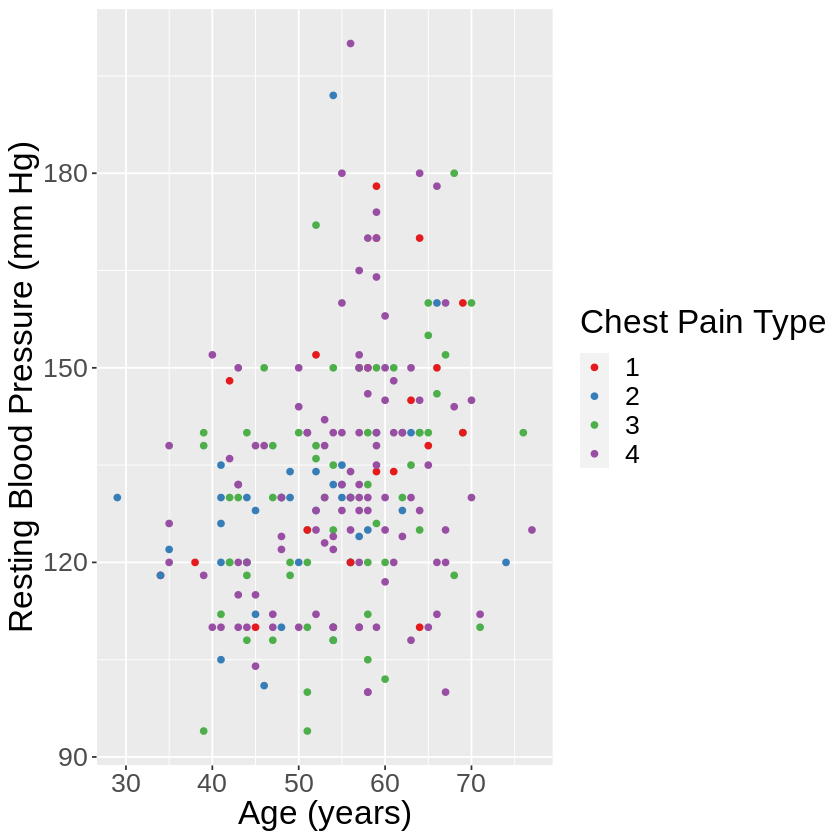

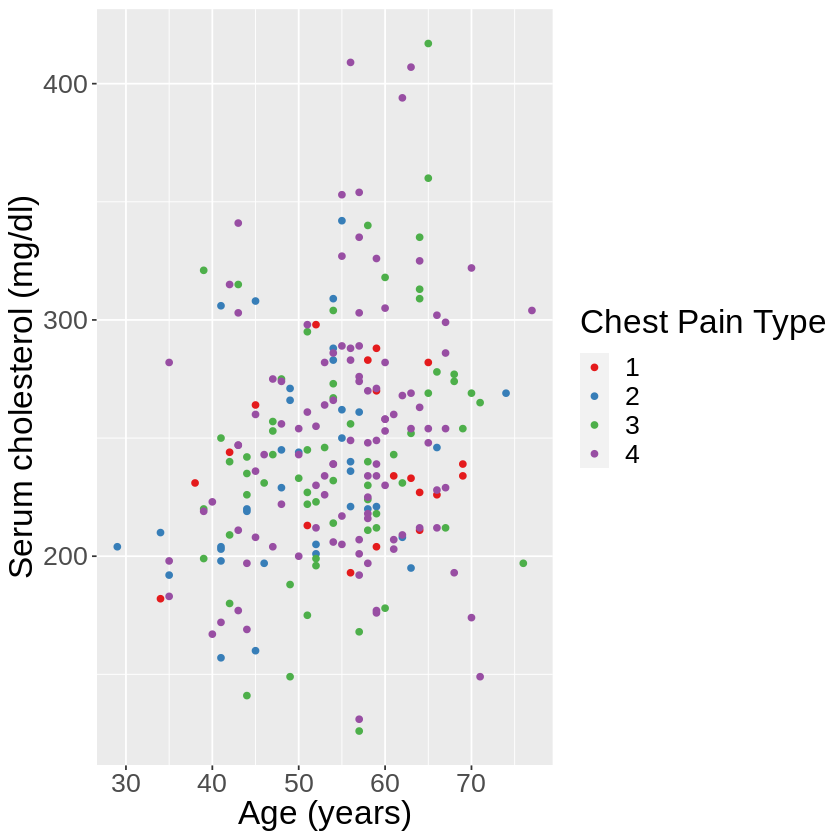

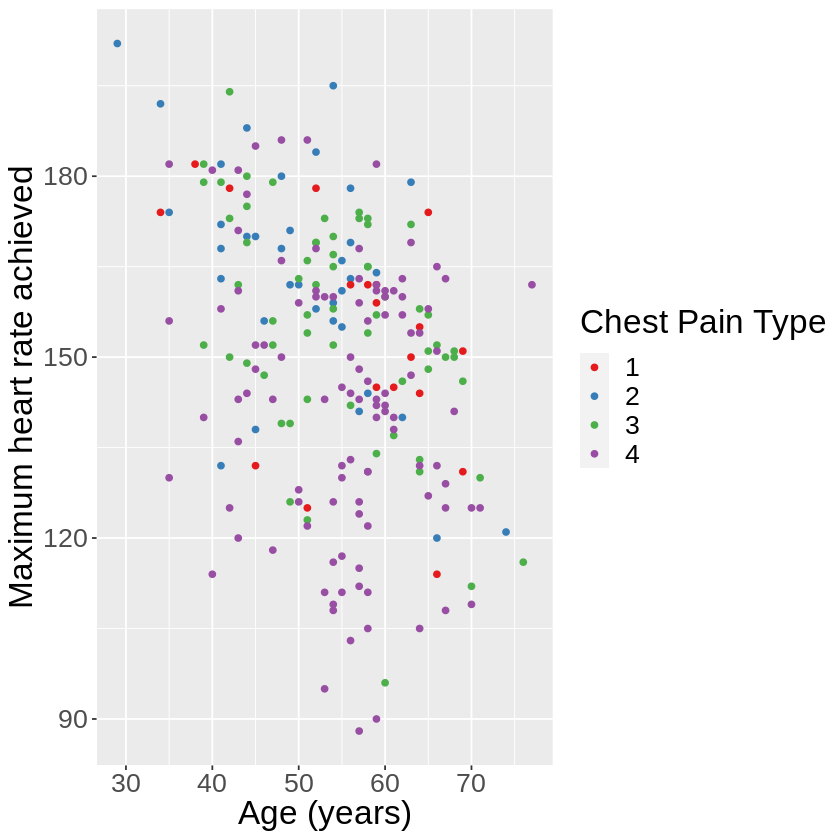

In [ ]:
#using training data, visualize data here

restbp_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

chol_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

thalach_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Maximum heart rate achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot

As we can see, each plot does not show a clear distribution of data for the tested predictors. This could be for many possible reasons. We only used numeric predictors - perhaps other predictors, such as sex, could yield a more clear distribution. For our actual project, we will try including more predictors.

## Methods

**Conducting Data Analysis:**
1. Attach necessary libraries
2. Read in “processed Cleveland” data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease, which is downloaded in the notebook
3. Tidy data
4. Split into training and testing set
5. Create recipe (scale any predictors if needed), knn specification (with tune, so we can find which *k* value to use), and classifier using training set
6. Perform cross-fold validations and test the metrics with various *k* values, then plot the data to find ideal *k* value
7. Once ideal *k* value is found (one that yields a high accuracy estimate), input that into a new specification and classifier
8. Create prediction classification (via recipe, new specification, and new classifier)
9. Evaluate the estimate accuracy of the classifier on the test set using the predict function

Variables used as predictors are: 
`age`, 
`resting blood pressure`, 
`cholesterol`, 
`electrocardiographic results`, 
`heart rate achieved`, 
`sex`, `fasting blood sugar amount`, and `exercise-induced angina`


**Visualizing results:** We will use a scatterplot graph, with chest pain colour-coded.

## Expected Outcomes and Significance

**We expect to find:**
the type of chest pain a patient with heart disease/conditions could expect to have (based on other aspects of their medical information).

**What impact could our findings have?**
Predicting chest pain type can help the patient/doctor prepare for treating that symptom. Further data analysis could describe which factor(s) directly lead to a certain chest pain type.

**What future questions could this lead to?**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)?
- What other variables could be used in predicting chest pain and if those variables were added would that increase the estimate accuracy?
